### churn rate for sep

In [220]:
import pandas as pd
import numpy as np

In [221]:
data = pd.read_csv('NueBevABTest.csv')

In [222]:
data['Customer Begin'] = pd.to_datetime(data['Customer Begin'])
data['Customer End'] = pd.to_datetime(data['Customer End'], format='%Y-%m-%d')

In [223]:
data['End'] = data['Customer End'].apply(lambda x: x.replace(day=1))
data['Begin'] = data['Customer Begin'].apply(lambda x: x.replace(day=1))

In [224]:
data['Churned'] = data['Churned'].astype('float')

In [225]:
data.head()

,Client number,Region,Customer Begin,Customer End,Churned,Margin Group,Account Size,End,Begin
0,6025,Los Angeles,2016-06-24,2017-01-27,0.0,High,Medium,2017-01-01,2016-06-01
1,7586,Los Angeles,2016-03-10,2017-01-24,0.0,High,Large,2017-01-01,2016-03-01
2,9740,Los Angeles,2016-02-26,2016-12-09,1.0,High,Large,2016-12-01,2016-02-01
3,1112,Toronto,2016-07-05,2016-10-28,1.0,Low,Small,2016-10-01,2016-07-01
4,1223,Toronto,2015-04-27,2017-01-31,0.0,Low,Medium,2017-01-01,2015-04-01


In [226]:
dates = [pd.to_datetime('2011-09'), pd.to_datetime('2017-01')]

In [227]:
import datetime
from dateutil.rrule import rrule, MONTHLY

strt_dt = dates[0]
end_dt = dates[1]

dates = [dt for dt in rrule(MONTHLY, dtstart=strt_dt, until=end_dt)]

In [228]:
dates = sorted(dates)

In [229]:
def within_time_period(start, end, target, churned):
    """
    Return true if the target time is between start and end timestamp
    """
    if (target >= start) and (target < end):
        return False
    elif (target == end) and churned == 0:
        return False
    elif (target == end) and churned == 1:
        return True
    else:
        return None

In [230]:
table = pd.DataFrame(columns=dates, index=range(data.shape[0]))

In [231]:
nrow, ncol  = table.shape

In [232]:
# fill the number to the data. 
for i in range(nrow):
    start = data['Begin'][i]
    end = data['End'][i]
    churned = data['Churned'][i]
    for j in range(ncol):
        result = within_time_period(start, end, dates[j], churned)
        table.iloc[i, j] = result

In [233]:
rates = np.mean(table, axis = 0)[-5:]

### rate per month

In [234]:
rates

2016-09-01    0.031496
2016-10-01    0.077236
2016-11-01    0.044053
2016-12-01    0.041475
2017-01-01    0.000000
dtype: float64

## overall rate per month

In [235]:
np.mean(rates)

0.038851870632770624

### churn rate for sep

In [23]:
pd.to_datetime('2011-09') < pd.to_datetime('2017-01')

True

In [24]:
client_join_in_sep_or_before = data[data.Begin <= pd.to_datetime('2016-09')]

In [27]:
pd.value_counts(data.End)

2017-01-01    208
2016-10-01     19
2016-11-01     10
2016-12-01      9
2016-09-01      8
Name: End, dtype: int64

In [28]:
client_quit_in_sep_or_later = client_join_in_sep_or_before[client_join_in_sep_or_before.End >= pd.to_datetime('2016-09')]

In [41]:
churn_sep = client_quit_in_sep_or_later[client_quit_in_sep_or_later.End == pd.to_datetime('2016-09')].Churned.sum()/data.shape[0]
churn_sep

0.031496062992125984

### churn rate of oct

In [36]:
client_stay_after_sep = data[data.End > pd.to_datetime('2016-09')]

In [42]:
churn_oct = client_stay_after_sep[client_stay_after_sep.End ==pd.to_datetime('2016-10')].Churned.sum()/client_stay_after_sep.shape[0]
churn_oct

0.07723577235772358

### churn rate of nov

In [39]:
client_stay_after_oct = data[data.End > pd.to_datetime('2016-10')]

In [43]:
churn_nov = client_stay_after_oct[client_stay_after_oct.End ==pd.to_datetime('2016-11')].Churned.sum()/client_stay_after_oct.shape[0]
churn_nov

0.04405286343612335

### churn rate of dec

In [44]:
client_stay_after_nov = data[data.End > pd.to_datetime('2016-11')]
churn_dec = client_stay_after_nov[client_stay_after_nov.End ==pd.to_datetime('2016-12')].Churned.sum()/client_stay_after_nov.shape[0]
churn_dec

0.041474654377880185

### churn rate of jan

In [45]:
client_stay_after_dec = data[data.End > pd.to_datetime('2016-12')]
churn_jan = client_stay_after_dec[client_stay_after_dec.End ==pd.to_datetime('2017-01')].Churned.sum()/client_stay_after_dec.shape[0]
churn_jan

0.0

### overall rate

In [236]:
data.Churned.mean()

0.18110236220472442

## write up

In [14]:
data.head()

,Client number,Region,Customer Begin,Customer End,Churned,Margin Group,Account Size,End,Begin
0,6025,Los Angeles,2016-06-24,2017-01-27,0.0,High,Medium,2017-01-01,2016-06-01
1,7586,Los Angeles,2016-03-10,2017-01-24,0.0,High,Large,2017-01-01,2016-03-01
2,9740,Los Angeles,2016-02-26,2016-12-09,1.0,High,Large,2016-12-01,2016-02-01
3,1112,Toronto,2016-07-05,2016-10-28,1.0,Low,Small,2016-10-01,2016-07-01
4,1223,Toronto,2015-04-27,2017-01-31,0.0,Low,Medium,2017-01-01,2015-04-01


In [30]:
import matplotlib.pyplot as plt

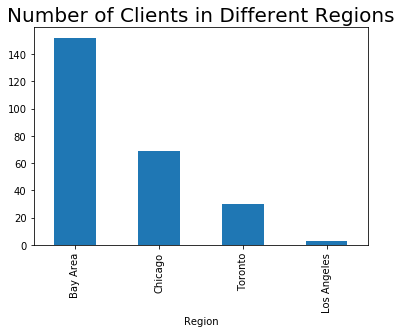

In [183]:
data.groupby('Region').size().sort_values(ascending = False).plot.bar()
plt.title('Number of Clients in Different %s' % ('Regions'), fontsize = 20)
plt.show()

In [181]:
data.groupby('Region').size().sort_values(ascending = False)

Region
Bay Area       152
Chicago         69
Toronto         30
Los Angeles      3
dtype: int64

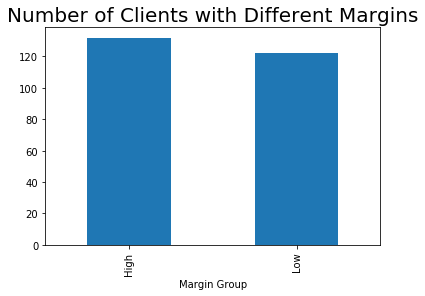

In [184]:
data.groupby('Margin Group').size().sort_values(ascending = False).plot.bar()
plt.title('Number of Clients with Different %s' % ('Margins'), fontsize = 20)
plt.show()

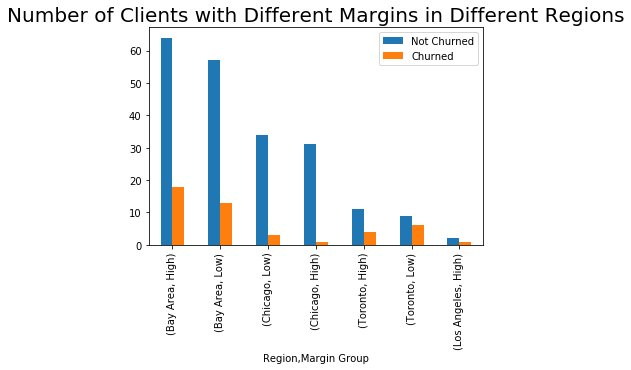

In [185]:
data.groupby(['Region','Margin Group', 'Churned']).size().unstack().sort_values(0.0,ascending = False).plot.bar()
plt.title('Number of Clients with Different Margins in Different %s' % ('Regions'), fontsize = 20)
plt.legend(labels=['Not Churned','Churned'])
plt.show()

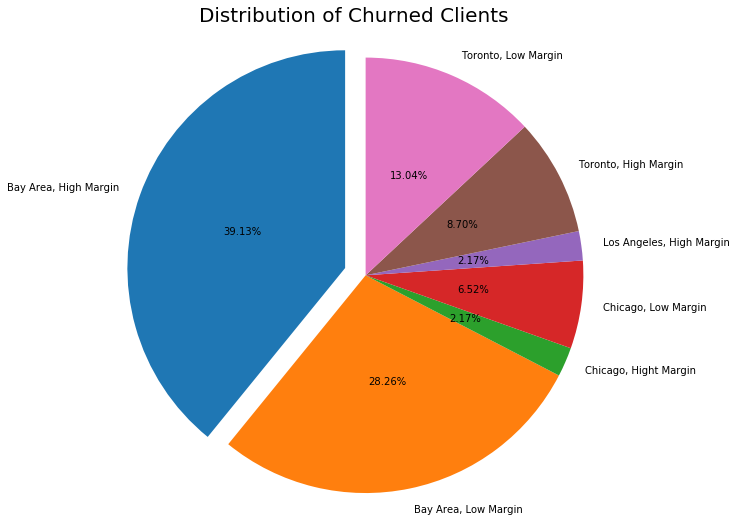

In [204]:
plt.figure(figsize=(9,9))
labels = [u'Bay Area, High Margin',u'Bay Area, Low Margin',u'Chicago, Hight Margin',u'Chicago, Low Margin',\
         u'Los Angeles, High Margin',u'Toronto, High Margin',u'Toronto, Low Margin']
sizes = [18,13,1,3,1,4,6]

explode = (0.1,0,0,0,0,0,0)
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      autopct = '%3.2f%%', 
                      shadow = False, 
                      startangle =90, 
                      pctdistance = 0.5)

plt.title('Distribution of Churned Clients',fontsize = 20)
plt.axis('equal')
plt.show()


In [195]:
len(labels)

6

In [192]:
data[data.Churned == 1].groupby(['Region','Margin Group', 'Churned']).size().index

MultiIndex(levels=[[u'Bay Area', u'Chicago', u'Los Angeles', u'Toronto'], [u'High', u'Low'], [1.0]],
           labels=[[0, 0, 1, 1, 2, 3, 3], [0, 1, 0, 1, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0]],
           names=[u'Region', u'Margin Group', u'Churned'])

In [171]:
a = data.pivot_table(values='Churned', index=['Region'],columns=['Margin Group'])
a

Margin Group,High,Low
Region,,
Bay Area,0.219512,0.185714
Chicago,0.031250,0.081081
Los Angeles,0.333333,NaN
Toronto,0.266667,0.400000


In [168]:
b = data.pivot_table(values=['Churned'], index=['Region'],columns=['Margin Group'],aggfunc=np.sum)
b.columns

MultiIndex(levels=[[u'Churned'], [u'High', u'Low']],
           labels=[[0, 0], [0, 1]],
           names=[None, u'Margin Group'])

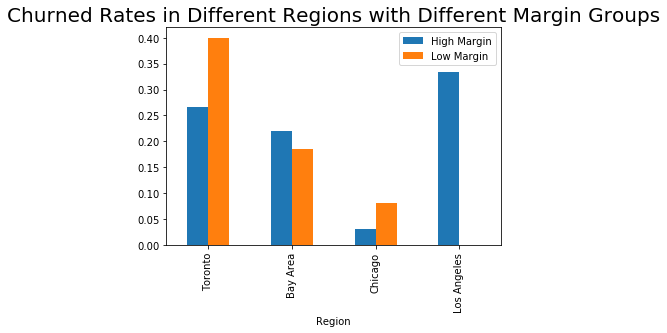

In [205]:
a.sort_values(('Low'),ascending = False).plot.bar()
plt.title('Churned Rates in Different %s' % ('Regions with Different Margin Groups'), fontsize = 20)
plt.legend(labels=['High Margin','Low Margin'])
plt.show()

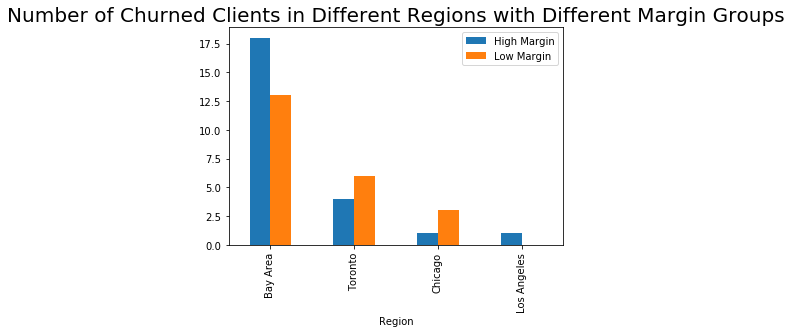

In [206]:
b.sort_values(('Churned','Low'),ascending = False).plot.bar()
plt.title('Number of Churned Clients in Different %s' % ('Regions with Different Margin Groups'), fontsize = 20)
plt.legend(labels=['High Margin','Low Margin'])
plt.show()

In [139]:
data.groupby(['Region', 'Churned','Margin Group']).size()

Region       Churned  Margin Group
Bay Area     0.0      High            64
                      Low             57
             1.0      High            18
                      Low             13
Chicago      0.0      High            31
                      Low             34
             1.0      High             1
                      Low              3
Los Angeles  0.0      High             2
             1.0      High             1
Toronto      0.0      High            11
                      Low              9
             1.0      High             4
                      Low              6
dtype: int64

In [ ]:
.unstack().sort_values('High',ascending = False).plot.bar()
plt.title('Number of Churned Clients on Different %s' % ('Regions and Margin Groups'), fontsize = 20)
plt.legend(labels=['High Margin','Low Margin'])
plt.show()

## Question 2

AB-test makes sense in this case because we are trying to compare the churn rate of two different groups, and AB-test is a method to give a statistical conclusion. 

Another method can be linear regression that studies the relationship between margin level and churned rate. But it is hard for linear regression to study exactly the behaviors of two groups, in our case, margin 15% and 18%. So an AB-test is neccessary. 


## Quesiton 3

To examine the effect of raising the margin, we would run a AB test to our users. We would use the group of users with 15% margin as our control group, and the group of users with higher margin, 18%, as our experiment group. Then we would study whether the churned rate is the same for these two group of users. The type of A/B testing we will use is test of propotion as the question of interest is the churn rate of the two groups. 

The framework of the A/B test will be designed with following steps: 

1. with the table above, calculate the overal average churn rate grouped by two groups. say the two churn rate is p1 and p2 for control group and experiment group, respectively

2. because for each customer, churn or not is a bernouli trial with $\pi$, the variance of the two churn rate is $\frac{\pi*(1-\pi)}{n}$, where n is the number of total client. Therefore, each p follows the normal distribution: $N(\pi, \frac{\pi*(1-\pi)}{n})$

3. set hypothesis 
$$H_{0}: \pi_{1} = \pi_{2}$$
$$H_{1}: \pi_{1} \neq \pi_{2}$$

4. calculate the statistics of the as $\frac{p1-p2}{\frac{p1-(1-p1}{n1}+\frac{p2-(1-p2}{n2}}$ follows N(0,1)

5. finally compare the statistics against a cutoff point or \alpha level to decide reject $$H_{0}$$ or not. 

To avoid affecting users, we group the users into different segments by their location and apply let users from one region all be control or test group. 


The potential rish is that users may realize they are in test and are paying different price for the catering food. 

## Question 4

We would run hypothesis test for a population mean on our data. 

We choose this test because we are trying to study the effect of different margin levels on the churned rate. So we will need to compare the average churned rate between two groups of users of different margin levels. If users with higher margins have higher, or lower churned rate statistically, then we can conclude that margin level does affect churned rate. 

Because we focus on the average value, which is the population mean of two groups, we are using hypothesis test for population mean. 

## Question 5

The null hyputhesis test is that two groups, either with high or low margin level, will have the same churned rate.

## Question 6

Alternative hypothesis will be two groups with different margin level will have different population mean. 

## Question 7

p value

## Question 8

1. as a starting point, we define the effect size as 0.1, which means lower margin group - control group has a 0.1 higher churn rate than experiment group

2. x: likelihood seeing this data, y: effective size. the plot is a decreasing trend